# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we are going to go through an example machine learning project with the goal of predicting the sale price of Bulldozers.

## Problem definition
> How well can we predict the feature sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## Data
There are three main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012. You make predictions on the set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## Evaluation
The evaluation metric for this competiton is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**NOTE:** The goal for most regression evaluation metrics is to minimize the error. For eg, our goal for this project will be to build a machine learning model which minimizes RMSLE.

## Features
Kaggle provides a data dict datailing all of the features of the dataset.

## 1. Importing Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## 2. Loading Data

In [2]:
# Importing training and validation sets
df = pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)
df[:1000]

FileNotFoundError: [Errno 2] No such file or directory: 'Data/bluebook-for-bulldozers/TrainAndValid.csv'

## 3. Exploratory Data Analysis

In [3]:
# Getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.saledate.dtype

dtype('O')

In [5]:
# Getting additional info
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [6]:
# Finding any null or missing value if there
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

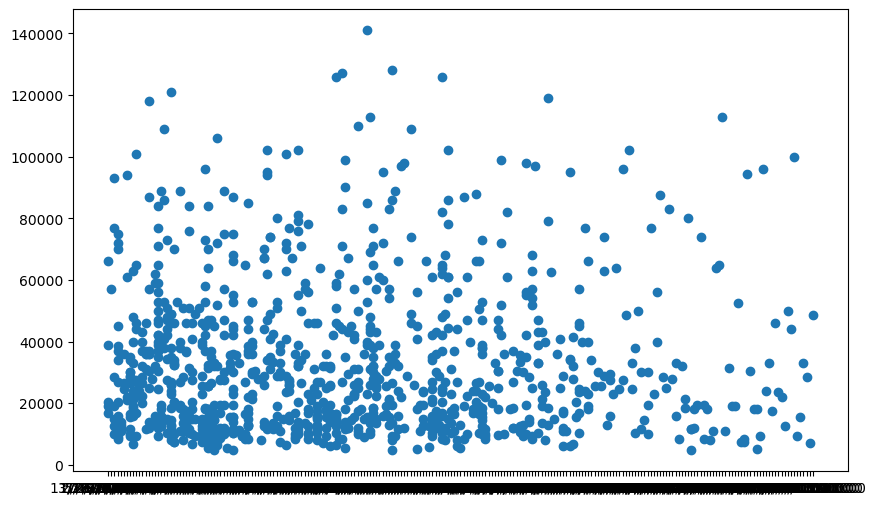

In [7]:
# Visualizing the SalePrice and saledate                         
fig, ax= plt.subplots(figsize=(10, 6))
ax = plt.scatter(df.saledate[:1000], df.SalePrice[:1000])

plt.show()

In [8]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

<Axes: ylabel='Frequency'>

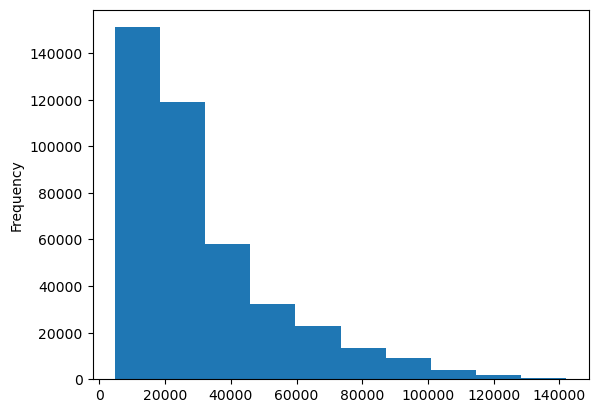

In [9]:
df.SalePrice.plot.hist()

### Parsing dates
When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter while making df.

In [10]:
# Import data again but this time parse dates
df = pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv", 
                 low_memory=False,
                 parse_dates=["saledate"])
df[:1000]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1142566,33000.0,1069733,5428,121,3.0,2005,3759.0,Medium,2009-07-16,...,None or Unspecified,None or Unspecified,Hydraulic,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
996,1142567,62000.0,531918,23162,121,3.0,2005,1290.0,Medium,2007-06-14,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
997,1142568,8000.0,1064508,17472,121,3.0,1998,1865.0,Medium,2005-09-22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,1142577,16000.0,1046210,13391,121,3.0,2004,851.0,High,2005-07-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [11]:
df.saledate.dtype

dtype('<M8[ns]')

In [12]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

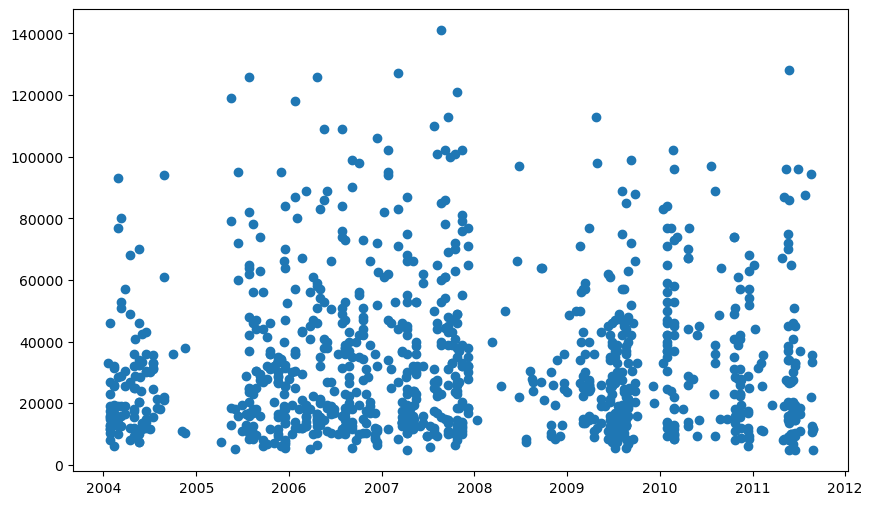

In [13]:
# Visualizing again with parse_date df
fig, ax = plt.subplots(figsize=(10, 6))
ax = plt.scatter(df.saledate[:1000], df.SalePrice[:1000])

plt.show()

In [14]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see three dots that represent the column we can't see because of the large number.

In [15]:
# To see all the columns 
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [16]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate
When working with time series data, It's a good idea to sort it by date.

In [17]:
# Sort DataFrame by saledate
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [18]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


#### Make a copy of original df
We should make a copy of original df where we can manipulate the data along the way. And when need, we can get back to our original df.

In [19]:
# Make a copy of original df
df_tem = df.copy()

### Add datetime parameters for `saledate` column

In [20]:
# Define a dictionary mapping new column names to their corresponding dt attributes
time_dict = {
    "saleDay": "day",
    "saleMonth": "month",
    "saleYear": "year",
    "saleDayOfWeek": "dayofweek",
    "saleDayOfYear": "dayofyear",
}

# Loop through the dictionary and create the columns
for label, attribute in time_dict.items():
    df_tem[label] = getattr(df_tem.saledate.dt, attribute)


In [21]:
df_tem.T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,...,409202,408976,411695,411319,408889,410879,412476,411927,407124,409203
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,...,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00,2012-04-28 00:00:00


In [22]:
# We don't need saledate feature now, so we'll remove it
df_tem.drop("saledate", axis=1, inplace=True)

In [23]:
# Check the values of different columns
df_tem.state.value_counts() 

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

**.value_counts()** is another way of seeing the data points distribution

## 4. Data Transformation
Now,, we'll do Model driven EDA

In [25]:
df_tem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [26]:
df_tem['UsageBand'].dtype

dtype('O')

### Convert string to categories
Convert data into numbers from pandas function

In [27]:
df_tem.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleDay,saleMonth,saleYear,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,17,1,1989,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,31,1,1989,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,31,1,1989,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,31,1,1989,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,31,1,1989,1,31


In [28]:
pd.api.types.is_string_dtype(df_tem["UsageBand"])

False

In [29]:
# Find the columns which contain str
for label, content in df_tem.items():
    if pd.api.types.is_object_dtype(content)==True:
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [30]:
## This will turn all of the str values into cat values
for label, content in df_tem.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        df_tem[label] = content.astype("category").cat.as_ordered()

In [31]:
df_tem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [33]:
df_tem.state.cat.codes # Above pandas func has converted str into num

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [34]:
## Check missing data
df_tem.isnull().sum()/len(df_tem)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

#### Save preprocessed data

**NOTE:** the CSV format does not preserve data types like category. When you save a DataFrame to a CSV file, all categorical columns are converted to strings or objects during the save process. Upon reloading, pandas cannot infer that those columns were categorical.
That's why we're saving it to pickle.

In [35]:
# Export current tmp dataframe
df_tem.to_pickle("Data/bluebook-for-bulldozers/train_tmp.pkl")

In [36]:
# Import preprocessed data
df_tem = pd.read_pickle("Data/bluebook-for-bulldozers/train_tmp.pkl")
df_tem.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


### Fill missing values

In [37]:
df_tem.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [38]:
for label, content in df_tem.items():
    if isinstance(content.dtype, pd.CategoricalDtype):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


44 cat columns

In [39]:
# Turn categorical variables into numbers and fill missing values
for label, content in df_tem.items():
    if isinstance(content.dtype, pd.CategoricalDtype):
        # Add binary column to indicate whether sample had missing value
        df_tem[label+"_is_missing"] = pd.isnull(content)
        # turn cat into num
        df_tem[label] = pd.Categorical(content).codes + 1 

**pd.Categorical** assigns -1 to the missing values by default, that's why we added +1 to make it 0

In [40]:
df_tem.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(44), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 72.4 MB


In [41]:
df_tem.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [42]:
df_tem.isna().sum()[:10]

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                        0
fiModelDesc                      0
dtype: int64

#### Splitting the data into training and validation sets

In [43]:
df_tem.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int32

In [44]:
df_tem.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

we can see the value count of 2012 which would be the num of rows in the valid data.

**Split the data**

In [45]:
# Since valid data starts with the year 2012, 
# we have to saparate the valid data from the year 2012.
df_tem_train = df_tem[df_tem['saleYear'] != 2012]
df_tem_valid = df_tem[df_tem["saleYear"] == 2012]

len(df_tem_train), len(df_tem_valid)

(401125, 11573)

#### Filling numerical missing values for training and validation set separately.

In [46]:
for label, content in df_tem_train.items():
    if pd.api.types.is_any_real_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [47]:
# Fill numeric rows with the median for df_tem_train
for label, content in df_tem_train.items():
    if pd.api.types.is_any_real_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column 
            df_tem_train[label+"_is_missing"] = pd.isnull(content) 
            # fill missing numeric values with median
            df_tem_train[label] = content.fillna(content.median())

C:\Users\yashr\AppData\Local\Temp\ipykernel_17348\2675009510.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_train[label+"_is_missing"] = pd.isnull(content)
C:\Users\yashr\AppData\Local\Temp\ipykernel_17348\2675009510.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_train[label] = content.fillna(content.median())
C:\Users\yashr\AppData\Local\Temp\ipykernel_17348\2675009510.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [48]:
# check if null values are there in the numeric data
for label, content in df_tem_train.items():
    if pd.api.types.is_any_real_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [49]:
for label, content in df_tem_valid.items():
    if pd.api.types.is_any_real_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MachineHoursCurrentMeter


In [50]:
# Checking 'MachineHoursCurrentMeter' feature median
df_tem_train['MachineHoursCurrentMeter'].median()

0.0

Filling 'MachineHoursCurrentMeter' median value to the same col in the valid set


In [51]:
# Add a binary column 
df_tem_valid["MachineHoursCurrentMeter_is_missing"] = df_tem_valid["MachineHoursCurrentMeter"].isna()
df_tem_valid["auctioneerID_is_missing"] = df_tem_valid["auctioneerID"].isna()

# fill missing numeric values with median
df_tem_valid["MachineHoursCurrentMeter"] = df_tem_valid["MachineHoursCurrentMeter"].fillna(0.0)

C:\Users\yashr\AppData\Local\Temp\ipykernel_17348\360341590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_valid["MachineHoursCurrentMeter_is_missing"] = df_tem_valid["MachineHoursCurrentMeter"].isna()
C:\Users\yashr\AppData\Local\Temp\ipykernel_17348\360341590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem_valid["auctioneerID_is_missing"] = df_tem_valid["auctioneerID"].isna()
C:\Users\yashr\AppData\Local\Temp\ipykernel_17348\360341590.py:6: SettingWithCopyWarning: 
A value is trying

In [52]:
# check if null values are there in the numeric data
for label, content in df_tem_valid.items():
    if pd.api.types.is_any_real_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [53]:
df_tem_train.columns.value_counts()

SalesID                                1
SalePrice                              1
MachineID                              1
ModelID                                1
datasource                             1
                                      ..
Travel_Controls_is_missing             1
Differential_Type_is_missing           1
Steering_Controls_is_missing           1
auctioneerID_is_missing                1
MachineHoursCurrentMeter_is_missing    1
Name: count, Length: 103, dtype: int64

In [54]:
df_tem_valid.columns.value_counts()

SalesID                                1
SalePrice                              1
MachineID                              1
ModelID                                1
datasource                             1
                                      ..
Travel_Controls_is_missing             1
Differential_Type_is_missing           1
Steering_Controls_is_missing           1
MachineHoursCurrentMeter_is_missing    1
auctioneerID_is_missing                1
Name: count, Length: 103, dtype: int64

## 5. Modelling

Now that all of data is **numeric** as well as our dataframe has **no missing values** and Columns in train and valid sets are also matching now. Let's Start Modelling.

In [55]:
len(df_tem_train), len(df_tem_valid)

(401125, 11573)

In [56]:
# First, let's Split data into X and y
X_train, y_train = df_tem_train.drop("SalePrice", axis=1), df_tem_train["SalePrice"]
X_valid, y_valid = df_tem_valid.drop("SalePrice", axis=1), df_tem_valid["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [63]:
%%time

#Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=40)

# Fit the model
model.fit(X_train, y_train)

CPU times: total: 41min 41s
Wall time: 5min 29s


RandomForestRegressor(n_jobs=-1, random_state=40)

In [64]:
# Score the model
model.score(X_train, y_train)

0.9875020221490072

In [65]:
# Score the model on valid test 
model.score(X_valid, y_valid)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [66]:
# Ensure both datasets have the same columns by reindexing:
X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)

In [67]:
# Ensure the columns are in the same order
X_valid = X_valid[X_train.columns]

In [68]:
# Score the model on valid test 
model.score(X_valid, y_valid)

0.8730364046947626

## 6. Hyperparameter tuning

### Building an evaluation function

In [69]:
# Create evaluation function (the competition)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
    
# Create a func to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train) # It must perform well on it.
    valid_preds = model.predict(X_valid)
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
              "Valid MAE" : mean_absolute_error(y_valid, valid_preds),
              "Training rmsle" : rmsle(y_train, train_preds),
              "Valid rmsle" : rmsle(y_valid, valid_preds),
              "Training r2" : r2_score(y_train, train_preds),
              "Valid r2" : r2_score(y_valid, valid_preds)}
    return scores

#### Testing our model on a subset (to tune the hyperparameters)

In [ ]:
# # This takes far too long .. for experimenting

# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=40)

# model.fit(X_train, y_train)

In [70]:
len(X_train)

401125

**First, we'll get the hyperparameter from a small sample and then fit the entire data on the model with best hyperparameter**

In [71]:
# Change max_sample value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=40,
                              max_samples=10000)
model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=40)

In [72]:
%%time
# Cutting down on the maz number of samples each estimator can see improves training time
model.fit(X_train, y_train)

CPU times: total: 1min 29s
Wall time: 12.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=40)

In [73]:
show_scores(model)

{'Training MAE': np.float64(5550.350204524774),
 'Valid MAE': np.float64(7105.769019268988),
 'Training rmsle': np.float64(0.2574304270434786),
 'Valid rmsle': np.float64(0.29301880867969776),
 'Training r2': 0.8610695205785539,
 'Valid r2': 0.8347905018928611}

In [ ]:
# # If we want to remove the 'np.float64', then this code will work
# metrics = {
#     'Training MAE': np.float64(5550.350204524774),
#     'Valid MAE': np.float64(7108.596071027391),
#     'Training rmsle': np.float64(0.2574304270434786),
#     'Valid rmsle': np.float64(0.29307617053976237),
#     'Training r2': 0.8610695205785539,
#     'Valid r2': 0.834743936266735
# }



# # Convert np.float64 to float
# cleaned_metrics = {key: float(value) if isinstance(value, np.float64) else value for key, value in metrics.items()}

# print(cleaned_metrics)

#### Hyperparameter tuning with RandomizedSearchCV

In [74]:
%%time

from sklearn.model_selection import RandomizedSearchCV
np.random.seed(40)

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_features": [0.5, 1, "sqrt", "log2"],
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_samples": [10000]}

# Instantiate the model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=40),
                              param_distributions=rf_grid,
                              n_iter=50,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: total: 31min 21s
Wall time: 7min 22s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=40),
                   n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'log2'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

rs_model.best_params_ on 5 iters:

* 'n_estimators': np.int64(40),
* 'min_samples_split': np.int64(8),
* 'min_samples_leaf': np.int64(5),
* 'max_samples': 10000,
* 'max_features': 'sqrt',
* 'max_depth': 10}

rs_model.best_params_ on 20 iters:

* {'n_estimators': np.int64(30),
* 'min_samples_split': np.int64(10),
* 'min_samples_leaf': np.int64(11),
* 'max_samples': 10000,
* 'max_features': 0.5,
* 'max_depth': None}

In [75]:
rs_model.best_params_ 

{'n_estimators': np.int64(30),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(11),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

show_scores(rs_model)
* {'Training MAE': np.float64(8935.103007811795),
* 'Valid MAE': np.float64(10244.189186905785),
* 'Training rmsle': np.float64(0.3927091546234812),
* 'Valid rmsle': np.float64(0.40877325591116687),
* 'Training r2': 0.684009245560091,
* 'Valid r2': 0.6983436842661557}

show_scores(rs_model)
* {'Training MAE': np.float64(6522.6394044126555),
* 'Valid MAE': np.float64(7818.728637038937),
* 'Training rmsle': np.float64(0.29284687364897166),
* 'Valid rmsle': np.float64(0.31543254365495504),
* 'Training r2': 0.8119458440791042,
* 'Valid r2': 0.802143346047052}

In [76]:
show_scores(rs_model)

{'Training MAE': np.float64(6522.6394044126555),
 'Valid MAE': np.float64(7827.4121201780345),
 'Training rmsle': np.float64(0.29284687364897166),
 'Valid rmsle': np.float64(0.315895427231796),
 'Training r2': 0.8119458440791042,
 'Valid r2': 0.8018988818849839}

#### Train a model with the best hyperparameters, this time on full dataset.
**Note:** These were found with 100 iters of RandomizedSearchCV

In [77]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators = 30,
                                    min_samples_split = 10,
                                    min_samples_leaf = 11,
                                    max_features = 0.5,
                                    max_depth = None,
                                    max_samples = None,
                                    random_state = 40,
                                    n_jobs=-1)

# fit the model
ideal_model.fit(X_train, y_train)

CPU times: total: 5min 24s
Wall time: 45.6 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=11,
                      min_samples_split=10, n_estimators=30, n_jobs=-1,
                      random_state=40)

In [78]:
show_scores(ideal_model)

{'Training MAE': np.float64(3957.156071276473),
 'Valid MAE': np.float64(6056.321736449924),
 'Training rmsle': np.float64(0.18929403014664178),
 'Valid rmsle': np.float64(0.24732580500744397),
 'Training r2': 0.9255461963373947,
 'Valid r2': 0.874395344755803}

In [79]:
show_scores(rs_model)

{'Training MAE': np.float64(6522.6394044126555),
 'Valid MAE': np.float64(7827.4121201780345),
 'Training rmsle': np.float64(0.29284687364897166),
 'Valid rmsle': np.float64(0.315895427231796),
 'Training r2': 0.8119458440791042,
 'Valid r2': 0.8018988818849839}

**we can see significant drop in the value of rmsle, which is good !!!**

## 6. Evaluation

### Make predictions on the test data

In [118]:
# Import the test data
df_test = pd.read_csv("Data/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates= ["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [119]:
# make predictions on the test dataset
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


#### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [120]:
# Define a dictionary mapping new column names to their corresponding dt attributes

def preprocess_data(df):
    """
    Performs transformation on df and returns transformed df.
    """
    time_dict = { "saleDay": "day",
                  "saleMonth": "month",
                  "saleYear": "year",
                  "saleDayOfWeek": "dayofweek",
                  "saleDayOfYear": "dayofyear",}

    # Loop through the dictionary and create the columns
    for label, attribute in time_dict.items():
        df[label] = getattr(df.saledate.dt, attribute)

    # removing saledate col
    df.drop("saledate", axis=1, inplace=True)

    ## This will turn all of the str values into cat values
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()

    # Turn categorical variables into numbers and fill missing values
    for label, content in df.items():
        if isinstance(content.dtype, pd.CategoricalDtype):
            # Add binary column to indicate whether sample had missing value
            df[label+"_is_missing"] = pd.isnull(content)
            # turn cat into num
            df[label] = pd.Categorical(content).codes + 1 

    return df

In [121]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [127]:
df_tem_train["MachineHoursCurrentMeter"].median()

0.0

In [129]:
# Fill numeric rows with the median for df_tem_train
for label, content in df_test.items():
    if pd.api.types.is_any_real_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column 
            df_test[label+"_is_missing"] = pd.isnull(content) 
             # fill missing numeric values with median value of the same column in the training data
            df_test[label] = content.fillna(0)

In [130]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to MachineHoursCurrentMeter_is_missing
dtypes: bool(45), float64(1), int16(2), int32(5), int64(6), int8(42)
memory usage: 2.0 MB


In [131]:
# Make predictions on updated test data
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [132]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [133]:
# Manually adjust df _test to have missing col name
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,MachineHoursCurrentMeter_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,False,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,False,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,True,True,True,True,True,False,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,True,True,True,True,True,False,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,False,False,False,True,True,False,False


Finally, now our test dataframe has the same features as our training dataframe, we can make predictions!

In [134]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [135]:
# Ensure the columns are in the same order
df_test = df_test[X_train.columns]

In [136]:
test_preds = ideal_model.predict(df_test)
test_preds

array([18827.43904897, 18391.60130803, 50427.57885221, ...,
       12567.74557623, 16907.23825602, 28065.1931641 ], shape=(12457,))

In [137]:
len(df_test)

12457

In [138]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,18827.439049
1,1227844,18391.601308
2,1227847,50427.578852
3,1227848,69271.900500
4,1227863,55381.776485
...,...,...
12452,6643171,40153.335091
12453,6643173,12754.715567
12454,6643184,12567.745576
12455,6643186,16907.238256


In [140]:
# Export predictions data
df_preds.to_csv("Data/bluebook-for-bulldozers/test_preds(mine).csv", index=False)

### Feature Importance

In [141]:
# Find Feature Importance of our best model
ideal_model.feature_importances_

array([3.24290269e-02, 1.65854386e-02, 3.98997800e-02, 1.58371078e-03,
       1.79822512e-03, 2.11797716e-01, 1.96241611e-03, 6.45029844e-04,
       3.55510139e-02, 3.35934442e-02, 7.46238946e-02, 4.27030248e-03,
       2.08243537e-02, 1.64088984e-01, 4.26230652e-02, 3.30983287e-03,
       2.04242447e-03, 2.71891457e-03, 2.35844620e-03, 6.73258492e-02,
       1.68916379e-04, 3.86590063e-04, 5.19793470e-04, 1.93897418e-04,
       6.73971872e-04, 1.10905139e-05, 2.84193125e-03, 1.94613359e-02,
       3.56532595e-03, 5.97692131e-03, 2.20004163e-03, 1.37442178e-03,
       2.43960463e-03, 2.93455264e-03, 2.58898303e-04, 1.08915751e-02,
       3.95884610e-04, 1.30641518e-02, 2.60428019e-03, 1.74985256e-03,
       4.76450863e-04, 8.93529184e-04, 2.68603463e-03, 4.17364239e-04,
       2.13655057e-04, 1.97090320e-04, 6.00208595e-04, 2.47126903e-03,
       8.71282550e-04, 2.16044929e-04, 2.35289503e-04, 2.84391535e-03,
       2.62089101e-03, 7.19802611e-02, 1.39762464e-03, 6.45415919e-03,
      

In [148]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importances")
    ax.invert_yaxis()

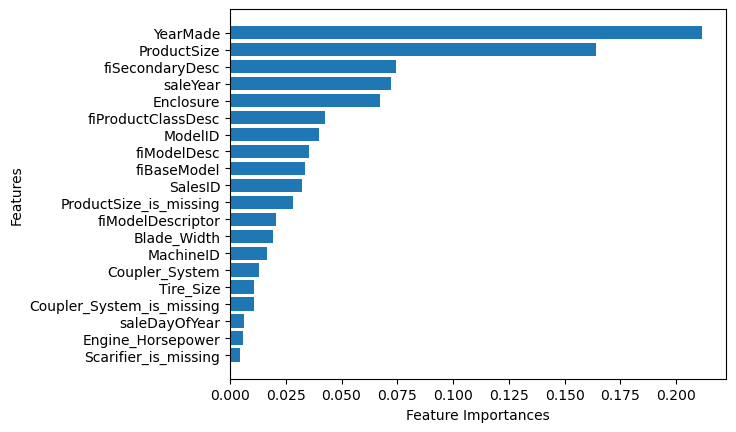

In [149]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [152]:
X_train["ProductSize"].value_counts()

ProductSize
0    210775
4     62274
3     49678
6     26494
5     24840
2     20975
1      6089
Name: count, dtype: int64